In [1]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [2]:
data_folder = "../data/columncompression20210227"
tpch_folder = "../data/columncompression20210227"
tpcds_folder = "../data/columncompression20210309"
job_folder = "../data/columncompression20210314"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def get_high_level(data_folder):
    high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
    high_level = high_level.sort_values("benchmark_run_name")
    # high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
    high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
    high_level["LTO"] = high_level["benchmark_run_name"].str.match(".*LTO.*")
    return high_level
high_level = get_high_level(data_folder)
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO
5,./tpch_bitpacking_compactvector_f_singlethread...,4.007143e+10,1.420814,bitpacking_compactvector_16,False
3,./tpch_bitpacking_compactvector_singlethreaded...,4.121527e+10,1.336982,bitpacking_compactvector,False
6,./tpch_bitpacking_simdcai_seq_singlethreaded.json,4.821127e+10,1.074156,for_SIMDCAI_simd_seq,False
0,./tpch_bitpacking_simdcai_singlethreaded.json,4.799611e+10,1.032475,for_SIMDCAI_simd,False
7,./tpch_bitpacking_turbopfor_seq_singlethreaded...,4.355870e+10,1.215173,bitpacking_turboPFOR_seq,False
8,./tpch_bitpacking_turbopfor_singlethreaded.json,3.988083e+10,1.452004,bitpacking_turboPFOR,False
1,./tpch_compressionUnencoded_singlethreaded.json,4.056447e+10,1.482762,unencoded_Hyrise,False
4,./tpch_dictionary_singlethreaded.json,3.819539e+10,1.573198,bytepacking_Hyrise_fsba,False
2,./tpch_simdbp_singlethreaded.json,6.599329e+10,0.858254,simdbp128_Hyrise,False


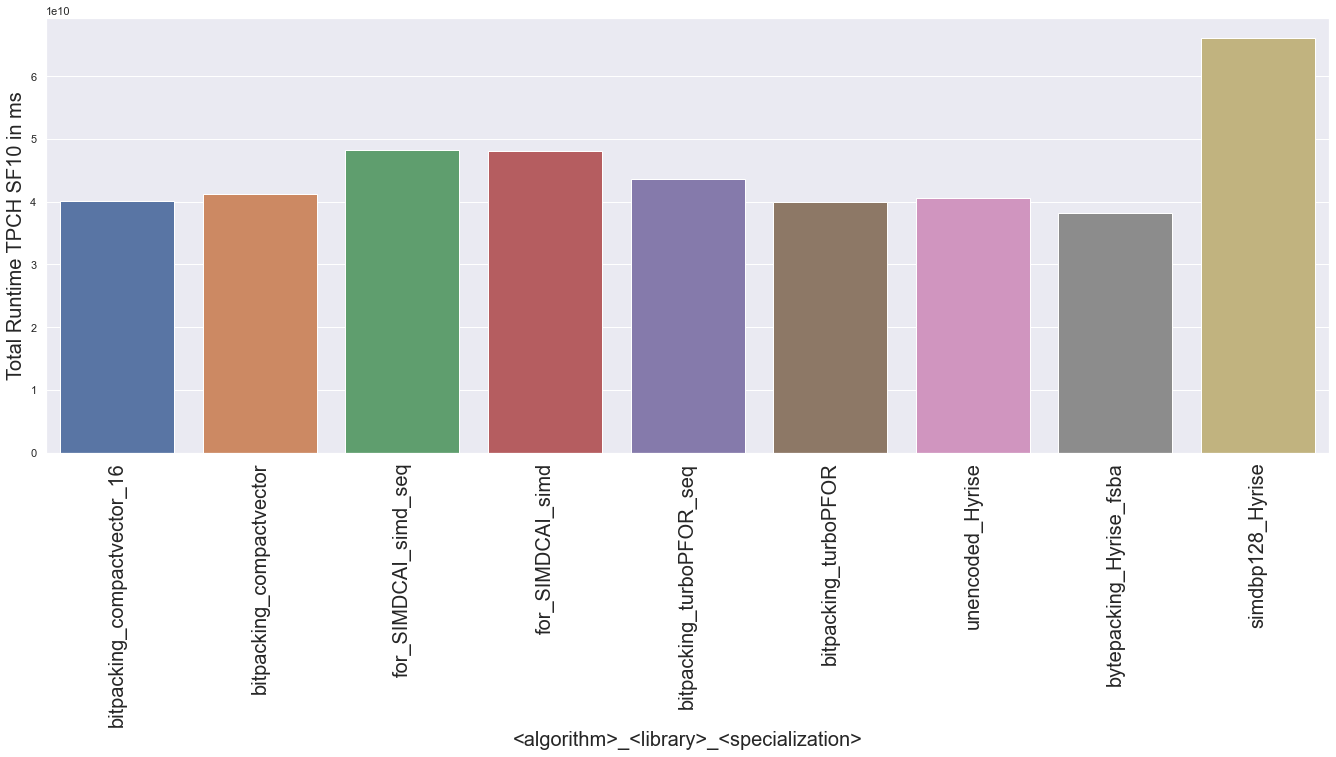

In [3]:
   
# https://stackoverflow.com/questions/28904397/how-to-set-the-value-of-the-axis-multiplier-in-matplotlib
class MagnitudeFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

sns.set(rc={'figure.figsize':(23,8)})


plot = sns.barplot(data=high_level, x="fancy_name", y="total_runtime")
plot.set_xlabel("<algorithm>_<library>_<specialization>",fontsize=20)
plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90, fontsize=20)

#for ax in plot.axes.flat:
# ax.yaxis.set_major_formatter(MagnitudeFormatter(6))
plt.savefig(f"visualizations/tpch_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

In [4]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")
low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp).*")]
low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [b.replace("TPC-H ", "") for b in low_level["query_name"]]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name
0,./tpch_bitpacking_simdcai_singlethreaded.json,01,6.790593e+09,0.147262,for_SIMDCAI_simd
176,./tpch_bitpacking_turbopfor_singlethreaded.json,01,5.544535e+09,0.180358,bitpacking_turboPFOR
154,./tpch_bitpacking_turbopfor_seq_singlethreaded...,01,7.233950e+09,0.138237,bitpacking_turboPFOR_seq
22,./tpch_compressionUnencoded_singlethreaded.json,01,5.493310e+09,0.182039,unencoded_Hyrise
66,./tpch_bitpacking_compactvector_singlethreaded...,01,6.215591e+09,0.160886,bitpacking_compactvector
...,...,...,...,...,...
87,./tpch_bitpacking_compactvector_singlethreaded...,22,4.814732e+08,2.076939,bitpacking_compactvector
153,./tpch_bitpacking_simdcai_seq_singlethreaded.json,22,5.654126e+08,1.768605,for_SIMDCAI_simd_seq
21,./tpch_bitpacking_simdcai_singlethreaded.json,22,6.075378e+08,1.645976,for_SIMDCAI_simd
43,./tpch_compressionUnencoded_singlethreaded.json,22,4.359958e+08,2.293575,unencoded_Hyrise


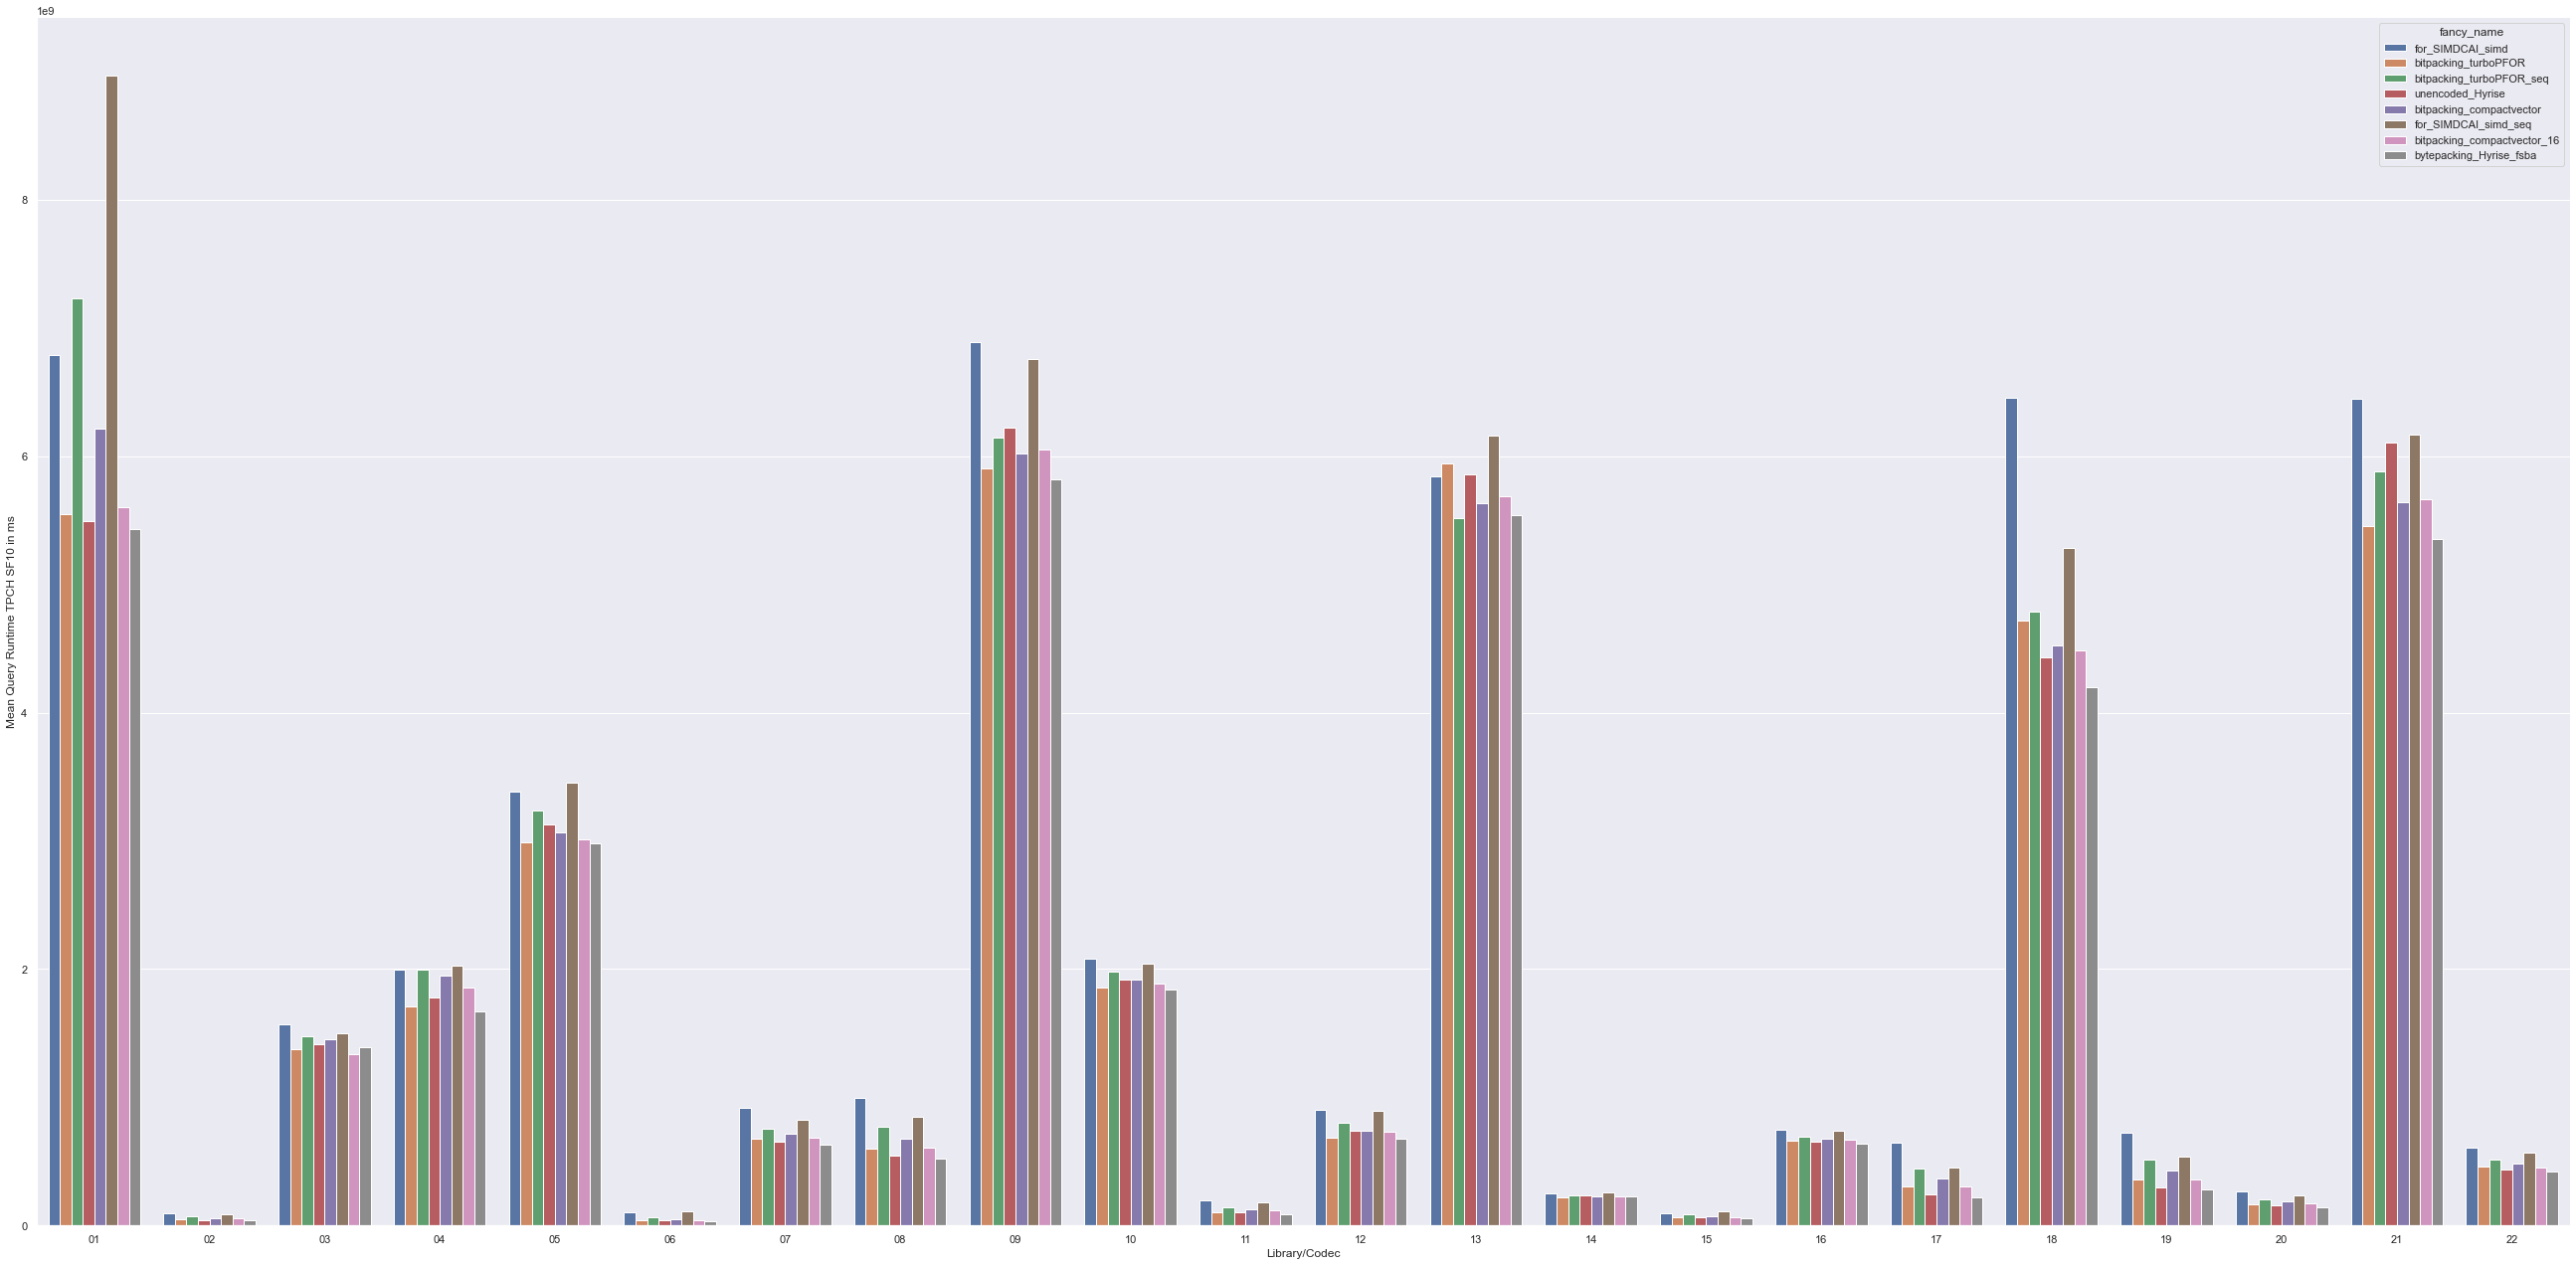

In [5]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="fancy_name", legend_out=False)
plot.set_axis_labels("Library/Codec", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(40,20)
for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(MagnitudeFormatter(9))
plt.savefig(f"visualizations/tpch_compression_low_level_absolute.svg", format="svg")

In [6]:
low_level_nolto = low_level[~low_level["benchmark_run_name"].str.match(".*(LTO).*")]
default_query_durations = low_level_nolto[low_level_nolto["benchmark_run_name"].str.match(".*Unencoded.*")]

low_level_nolto = low_level_nolto.merge(default_query_durations, how="left", left_on="query_name", right_on="query_name")
low_level_nolto["duration_percentage"] = low_level_nolto["avg_duration_x"] / low_level_nolto["avg_duration_y"]
low_level_nolto_nodefault = low_level_nolto[~low_level_nolto["benchmark_run_name_x"].str.match(".*unencoded.*")]

low_level_nolto_nodefault

,benchmark_run_name_x,query_name,avg_duration_x,throughput_x,fancy_name_x,benchmark_run_name_y,avg_duration_y,throughput_y,fancy_name_y,duration_percentage
0,./tpch_bitpacking_simdcai_singlethreaded.json,01,6.790593e+09,0.147262,for_SIMDCAI_simd,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.236157
1,./tpch_bitpacking_turbopfor_singlethreaded.json,01,5.544535e+09,0.180358,bitpacking_turboPFOR,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.009325
2,./tpch_bitpacking_turbopfor_seq_singlethreaded...,01,7.233950e+09,0.138237,bitpacking_turboPFOR_seq,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.316865
3,./tpch_compressionUnencoded_singlethreaded.json,01,5.493310e+09,0.182039,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.000000
4,./tpch_bitpacking_compactvector_singlethreaded...,01,6.215591e+09,0.160886,bitpacking_compactvector,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.131484
...,...,...,...,...,...,...,...,...,...,...
171,./tpch_bitpacking_compactvector_singlethreaded...,22,4.814732e+08,2.076939,bitpacking_compactvector,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.104307
172,./tpch_bitpacking_simdcai_seq_singlethreaded.json,22,5.654126e+08,1.768605,for_SIMDCAI_simd_seq,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.296830
173,./tpch_bitpacking_simdcai_singlethreaded.json,22,6.075378e+08,1.645976,for_SIMDCAI_simd,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.393449
174,./tpch_compressionUnencoded_singlethreaded.json,22,4.359958e+08,2.293575,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.000000


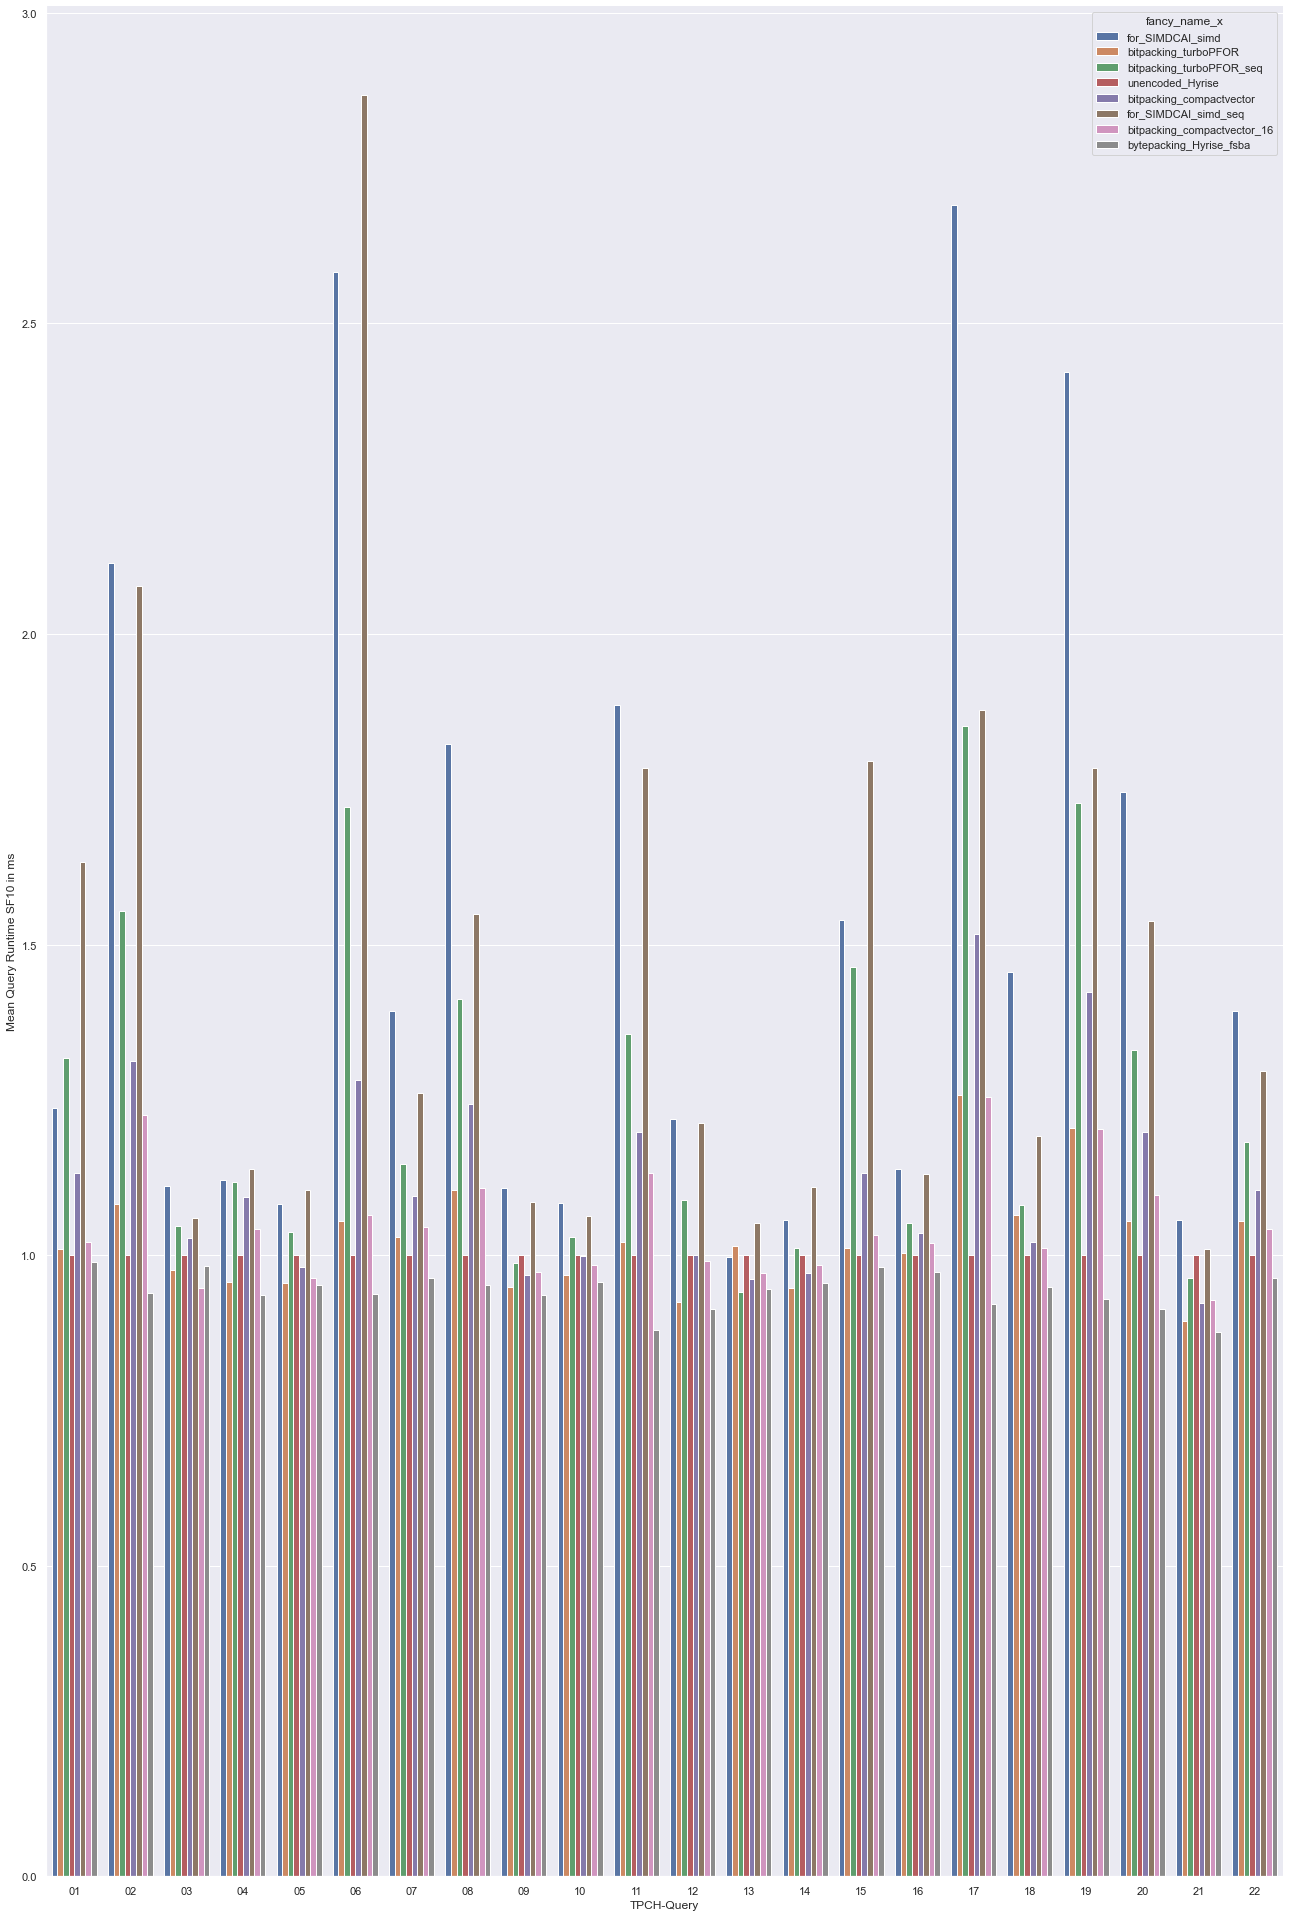

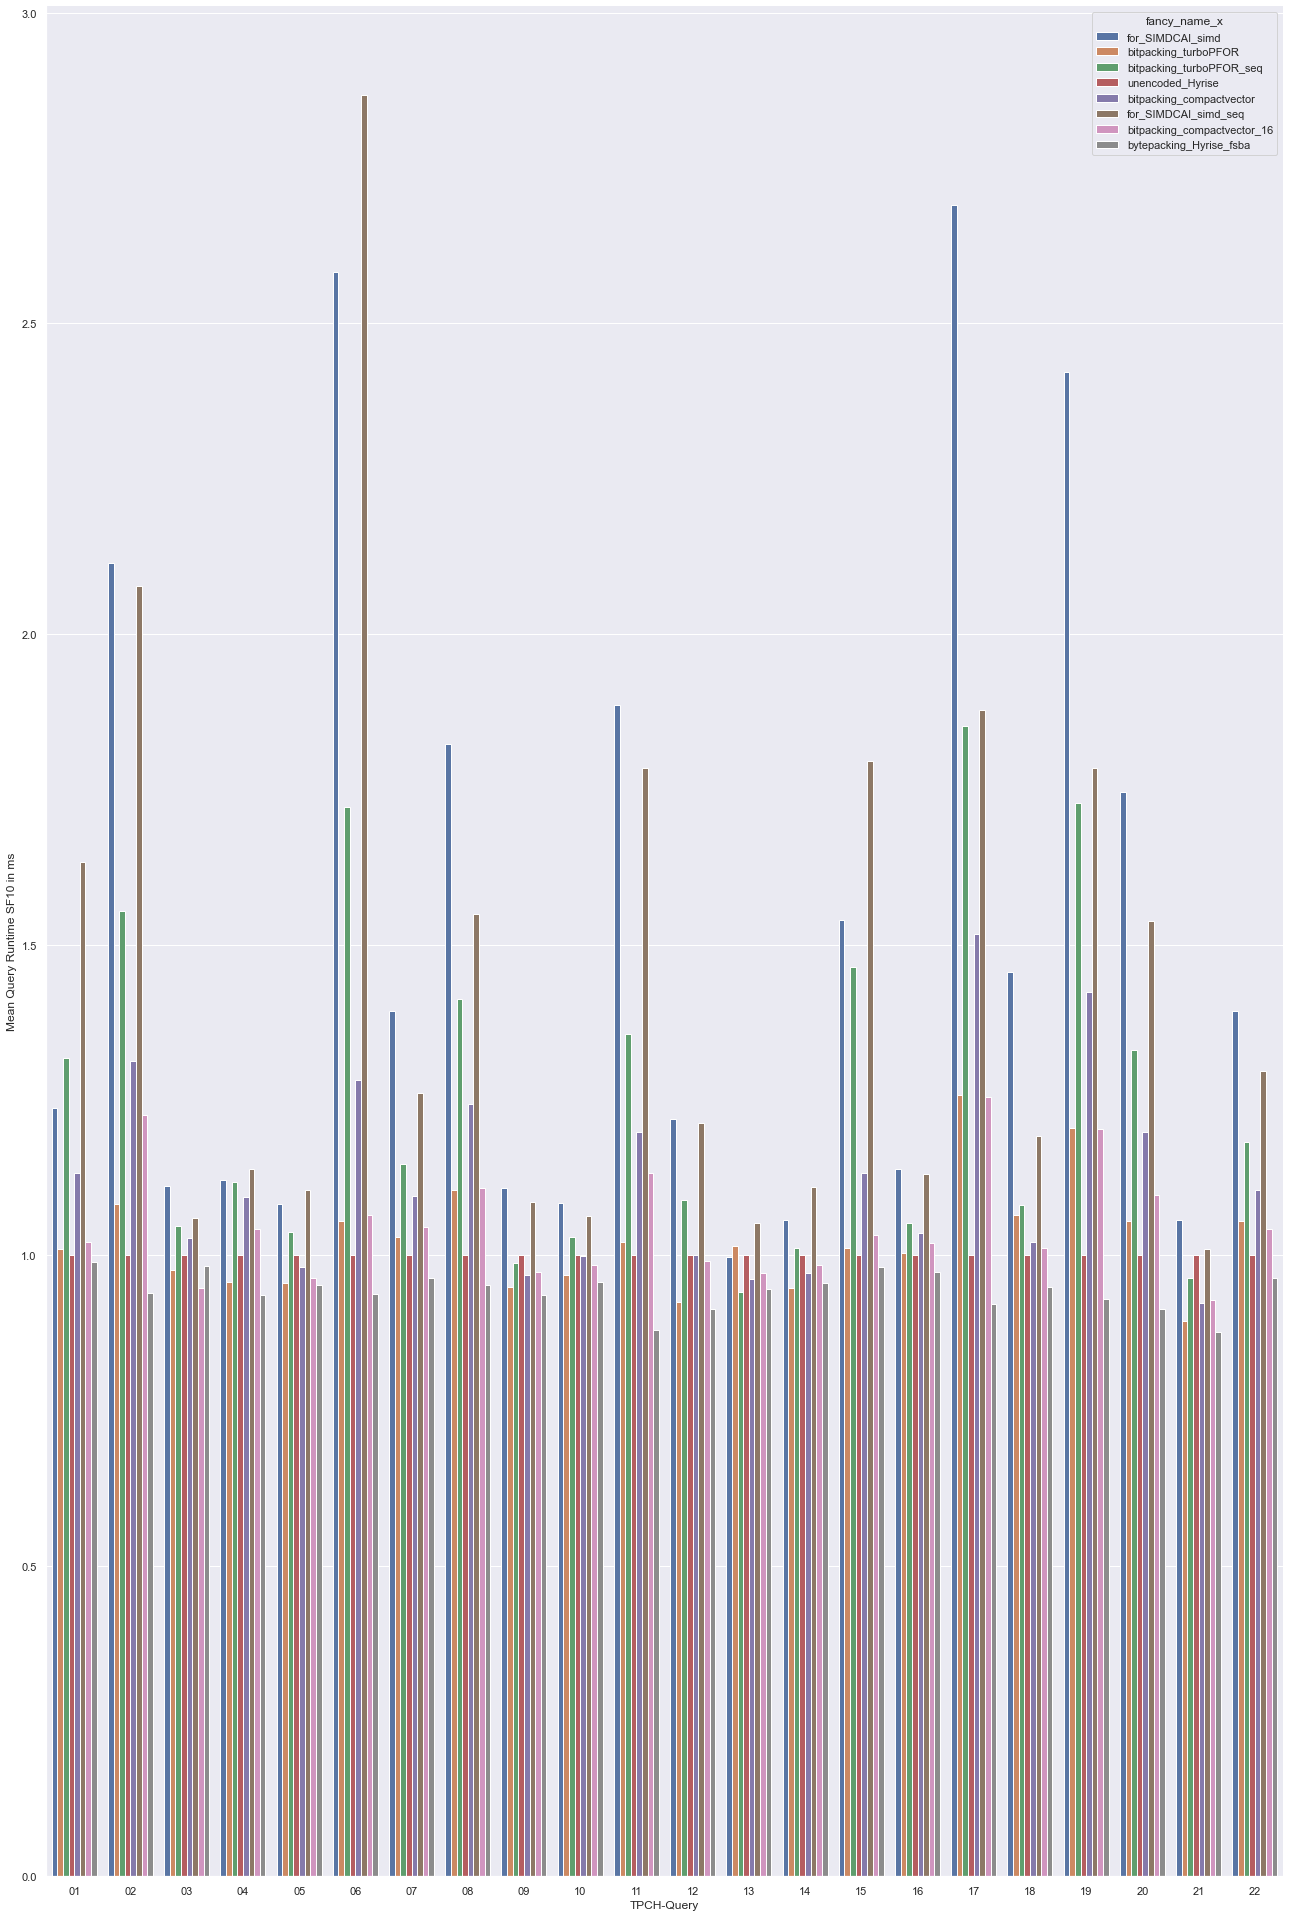

In [7]:

plot = sns.catplot(data=low_level_nolto, x="query_name", y="duration_percentage", kind="bar", hue="fancy_name_x", legend_out=False)
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,30)
plt.savefig(f"visualizations/tpch_compression_low_level_percentage.svg", format="svg")


codecs_of_interest = low_level_nolto[low_level_nolto["fancy_name_x"].str.match(".*(bitpacking_turboPFOR|unencoded_Hyrise|bitpacking_compactvector|)")]
plot = sns.catplot(data=codecs_of_interest, x="query_name", y="duration_percentage", kind="bar", hue="fancy_name_x", legend_out=False)
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,30)
plt.savefig(f"visualizations/tpch_compression_low_level_percentage.svg", format="svg")

In [8]:
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO
5,./tpch_bitpacking_compactvector_f_singlethread...,4.007143e+10,1.420814,bitpacking_compactvector_16,False
3,./tpch_bitpacking_compactvector_singlethreaded...,4.121527e+10,1.336982,bitpacking_compactvector,False
6,./tpch_bitpacking_simdcai_seq_singlethreaded.json,4.821127e+10,1.074156,for_SIMDCAI_simd_seq,False
0,./tpch_bitpacking_simdcai_singlethreaded.json,4.799611e+10,1.032475,for_SIMDCAI_simd,False
7,./tpch_bitpacking_turbopfor_seq_singlethreaded...,4.355870e+10,1.215173,bitpacking_turboPFOR_seq,False
8,./tpch_bitpacking_turbopfor_singlethreaded.json,3.988083e+10,1.452004,bitpacking_turboPFOR,False
1,./tpch_compressionUnencoded_singlethreaded.json,4.056447e+10,1.482762,unencoded_Hyrise,False
4,./tpch_dictionary_singlethreaded.json,3.819539e+10,1.573198,bytepacking_Hyrise_fsba,False
2,./tpch_simdbp_singlethreaded.json,6.599329e+10,0.858254,simdbp128_Hyrise,False


In [9]:

def load_table(path: Path) -> DataFrame:
    all_entries: List[List[str]] = []
    av_dict_entries: List[List[int]] = []
    column_names: List[str] = []
    types: List[str] = []
    with path.open() as file:
        table_starts: bool = False
        for line in file:
            if not table_starts and "attribute_vector_size" in line:
                e = [entry for entry in line.split(",") if entry != "" and entry != "\n"]
                av_dict_entries.append([int(e[1]), int(e[3])])
            if len(column_names) != 0 and table_starts and not '|' in line:
                break
            if not '|' in line:
                continue
            if len(column_names) == 0:
                column_names = [entry.replace(" ", "")
                                for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if len(types) == 0:
                types =  [entry.replace(" ", "")
                          for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if "<ValueS>" in line:
                table_starts = True
                continue
            if not table_starts:
                continue
            new_entry: List[str] = [entry.replace(" ", "")
                                    for entry in line.split("|") if entry != "" and entry != "\n"]
            all_entries.append(new_entry)
    as_type: Dict[str, str] = {column_names[i]:types[i] for i in range(0, len(column_names))}

    entries = [a + b for a,b, in zip(all_entries, av_dict_entries)]
    column_names = column_names + ["attribute_vector_size", "dict_size"]
    df = DataFrame(data=entries, columns=column_names).astype(as_type)

    df["dict_size"] = [1 if d == 0 else d for d in df["dict_size"]]
    df["duplication_factor"] = df["attribute_vector_size"] / df["dict_size"]

    df = df.astype({'duplication_factor': 'int32'})

    return df

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("sizes_","").replace(".txt", "")
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def fancy_codec_name(f):
    return f.replace("sizes_", "").replace(".txt", "")

def compute_sizes(df):
    total_size = df["size_in_bytes"].sum()

    int_col_size = df[df["column_data_type"].str.match("int")]["size_in_bytes"].sum()
    float_col_size = df[df["column_data_type"].str.match("float")]["size_in_bytes"].sum()
    string_col_size = df[df["column_data_type"].str.match("string")]["size_in_bytes"].sum()

    return (total_size, int_col_size, float_col_size, string_col_size)

def get_df(data_path):
    high_level = get_high_level(data_path)
    high_level["fancy_name"] = [n[2:] for n in high_level["fancy_name"]]
    default_filename = "sizes_compressionUnencoded.txt"
    default = load_table(Path(data_path) / "sizes" / default_filename)

    grouped_by_column = default.groupby(["table_name", "column_name", "column_data_type"], as_index=False)["size_in_bytes"].sum()
    columns_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["column_name"].count()
    size_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["size_in_bytes"].sum()
    #print("number of columns per datatype")
    #print(columns_per_data_type)



    (default_size, default_int_col_size, default_float_col_size, default_string_col_size) = compute_sizes(default)
    #print("default dict size ", default_size)
    #print("default dict int col size ", default_int_col_size)
    #print("default int col portion of size ", default_int_col_size / default_size)


    names = []
    total_sizes = []
    int_col_sizes = []
    float_col_sizes = []
    string_col_sizes = []
    directory = os.fsencode(Path(data_path) / "sizes")
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".txt"):
            p = Path(data_path) / "sizes" / filename
            #print(p)
            du = load_table(p)
            #print(du)
            #print(df)
            names.append(filename)
            (total_size, int_col_size, float_col_size, string_col_size) = compute_sizes(du)
            total_sizes.append(total_size)
            int_col_sizes.append(int_col_size)
            float_col_sizes.append(float_col_size)
            string_col_sizes.append(string_col_size)

    df = pd.DataFrame(data={'filename': names, 'total_size': total_sizes, 'int_col_sizes': int_col_sizes, 'float_col_sizes': float_col_sizes, 'string_col_sizes': string_col_sizes})
    #print(df)
    df["codec"] = [fancy_name(f) for f in df["filename"]]
    df = df.sort_values("codec")
    d = df.merge(high_level, left_on="codec", right_on="fancy_name")
    #print(df)
    #print(high_level)
    d["total_size"] = d["total_size"] / 10**9
    d["total_runtime"] = d["total_runtime"] / 10**9
    return d

get_df(tpch_folder)

,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO
0,sizes_bitpacking_compactvector.txt,9.868210,1445245248,664533612,7758431223,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,41.215268,1.336982,bitpacking_compactvector,False
1,sizes_bitpacking_compactvector_f.txt,11.316270,1609638576,989767660,8716863591,bitpacking_compactvector_16,./tpch_bitpacking_compactvector_f_singlethread...,40.071431,1.420814,bitpacking_compactvector_16,False
2,sizes_bitpacking_turbopfor.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR,./tpch_bitpacking_turbopfor_singlethreaded.json,39.880828,1.452004,bitpacking_turboPFOR,False
3,sizes_bitpacking_turbopfor_seq.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR_seq,./tpch_bitpacking_turbopfor_seq_singlethreaded...,43.558703,1.215173,bitpacking_turboPFOR_seq,False
4,sizes_dictionary.txt,9.999840,1372782099,676386560,7950670887,bytepacking_Hyrise_fsba,./tpch_dictionary_singlethreaded.json,38.195395,1.573198,bytepacking_Hyrise_fsba,False
5,sizes_bitpacking_simdcai.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd,./tpch_bitpacking_simdcai_singlethreaded.json,47.996114,1.032475,for_SIMDCAI_simd,False
6,sizes_bitpacking_simdcai_seq.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd_seq,./tpch_bitpacking_simdcai_seq_singlethreaded.json,48.211274,1.074156,for_SIMDCAI_simd_seq,False
7,sizes_simdbp.txt,9.552397,1307080816,602595564,7642720727,simdbp128_Hyrise,./tpch_simdbp_singlethreaded.json,65.993290,0.858254,simdbp128_Hyrise,False
8,sizes_compressionUnencoded.txt,13.063740,2083656732,1389433132,9590650263,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,40.564471,1.482762,unencoded_Hyrise,False


In [10]:
get_df(tpcds_folder)

,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO
0,sizes_bitpacking_compactvector.txt,6.394814,2901572456,3357457448,135784335,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,35.932983,2.407286,bitpacking_compactvector,False
1,sizes_bitpacking_compactvector_f.txt,7.790699,4192303712,3434407032,163987815,bitpacking_compactvector_16,./tpch_bitpacking_compactvector_f_singlethread...,33.381619,2.659867,bitpacking_compactvector_16,False
2,sizes_bitpacking_turbopfor.txt,5.555215,2409291312,3014156828,131767157,bitpacking_turboPFOR,./tpch_bitpacking_turbopfor_singlethreaded.json,31.954384,2.906853,bitpacking_turboPFOR,False
3,sizes_bitpacking_turbopfor_seq.txt,5.555215,2409291312,3014156828,131767157,bitpacking_turboPFOR_seq,./tpch_bitpacking_turbopfor_seq_singlethreaded...,38.311538,2.271096,bitpacking_turboPFOR_seq,False
4,sizes_dictionary.txt,6.257971,3041190559,3075083052,141697194,bytepacking_Hyrise_fsba,./tpch_dictionary_singlethreaded.json,30.263431,3.260406,bytepacking_Hyrise_fsba,False
5,sizes_bitpacking_simdcai.txt,5.539813,2394185376,3013955828,131671639,for_SIMDCAI_simd,./tpch_bitpacking_simdcai_singlethreaded.json,45.746779,1.750814,for_SIMDCAI_simd,False
6,sizes_bitpacking_simdcai_seq.txt,5.539813,2394185376,3013955828,131671639,for_SIMDCAI_simd_seq,./tpch_bitpacking_simdcai_seq_singlethreaded.json,52.694711,1.561975,for_SIMDCAI_simd_seq,False
7,sizes_simdbp.txt,5.509786,2358835280,3019404352,131545879,simdbp128_Hyrise,./tpch_simdbp_singlethreaded.json,51.621029,1.505968,simdbp128_Hyrise,False
8,sizes_compressionUnencoded.txt,10.902447,6207424816,4506051348,188971151,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,30.989867,3.061467,unencoded_Hyrise,False


In [26]:
tpch = get_df(tpch_folder)
tpch["benchmark"] = "TPC-H"
tpcds = get_df(tpcds_folder)
tpcds["benchmark"] = "TPC-DS"
job = get_df(job_folder)
job["benchmark"] = "JOB"

TypeError: string indices must be integers

In [34]:
tpch[tpch["codec"] == "unencoded_Hyrise"]
benchmark_disjoint = [tpch, tpcds, job]
for b in [tpch, tpcds, job]:
    defa = b[b["codec"] == "unencoded_Hyrise"]
    b["relative_runtime"] = b["total_runtime"] / float(defa["total_runtime"])
    b["relative_size"] = b["total_size"] / float(defa["total_size"])
benchmarks = pd.concat(benchmark_disjoint)
benchmarks

,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO,benchmark,relative_runtime,relative_size
0,sizes_bitpacking_compactvector.txt,9.868210,1445245248,664533612,7758431223,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,41.215268,1.336982,bitpacking_compactvector,False,TPC-H,1.016044,0.755389
1,sizes_bitpacking_compactvector_f.txt,11.316270,1609638576,989767660,8716863591,bitpacking_compactvector_16,./tpch_bitpacking_compactvector_f_singlethread...,40.071431,1.420814,bitpacking_compactvector_16,False,TPC-H,0.987846,0.866235
2,sizes_bitpacking_turbopfor.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR,./tpch_bitpacking_turbopfor_singlethreaded.json,39.880828,1.452004,bitpacking_turboPFOR,False,TPC-H,0.983147,0.733524
3,sizes_bitpacking_turbopfor_seq.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR_seq,./tpch_bitpacking_turbopfor_seq_singlethreaded...,43.558703,1.215173,bitpacking_turboPFOR_seq,False,TPC-H,1.073814,0.733524
4,sizes_dictionary.txt,9.999840,1372782099,676386560,7950670887,bytepacking_Hyrise_fsba,./tpch_dictionary_singlethreaded.json,38.195395,1.573198,bytepacking_Hyrise_fsba,False,TPC-H,0.941597,0.765465
5,sizes_bitpacking_simdcai.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd,./tpch_bitpacking_simdcai_singlethreaded.json,47.996114,1.032475,for_SIMDCAI_simd,False,TPC-H,1.183206,0.732359
6,sizes_bitpacking_simdcai_seq.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd_seq,./tpch_bitpacking_simdcai_seq_singlethreaded.json,48.211274,1.074156,for_SIMDCAI_simd_seq,False,TPC-H,1.188510,0.732359
7,sizes_simdbp.txt,9.552397,1307080816,602595564,7642720727,simdbp128_Hyrise,./tpch_simdbp_singlethreaded.json,65.993290,0.858254,simdbp128_Hyrise,False,TPC-H,1.626874,0.731215
8,sizes_compressionUnencoded.txt,13.063740,2083656732,1389433132,9590650263,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,40.564471,1.482762,unencoded_Hyrise,False,TPC-H,1.000000,1.000000
0,sizes_bitpacking_compactvector.txt,6.394814,2901572456,3357457448,135784335,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,35.932983,2.407286,bitpacking_compactvector,False,TPC-DS,1.159508,0.586549


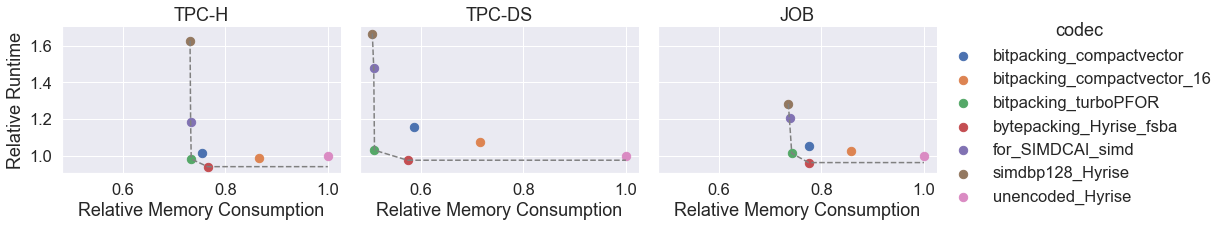

In [70]:
sns.set(font_scale=1.5)
data = benchmarks[~benchmarks["codec"].str.match(".*_seq")]
g = sns.FacetGrid(data, col="benchmark", hue="codec", legend_out=True, height=3.5, aspect=1.3)
g.map(plt.scatter, "relative_size", "relative_runtime", s=70)
#g.map(plt.plot, "total_size", "total_runtime")
g.set_axis_labels("Relative Memory Consumption", "Relative Runtime")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()

def pareto_frontier(Xs, Ys, maxX=False, maxY=False):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    return pareto_front

for ax in g.axes[0]:
    benchmark = ax.title.get_text()
    data_for_benchmark = benchmarks[benchmarks["benchmark"] == benchmark]
    x = list(data_for_benchmark["relative_size"])
    y = list(data_for_benchmark["relative_runtime"])
    par = pareto_frontier(x, y)
    par.append([max(x), par[-1][1]])
    ax.plot([p[0] for p in par], [p[1] for p in par], color="grey", linestyle="dashed")

#plt.setp(g._legend.get_title(), fontsize=14.5)
#plt.setp(g._legend.get_texts(), fontsize=14.5)
    #plt.setp(ax.get_legend().get_texts(), fontsize=22)  # for legend text
    #plt.setp(ax.get_legend().get_title(), fontsize=22)  # for legend title

plt.savefig(f"visualizations/pareto_2.svg", format="svg")

'TPC-H'

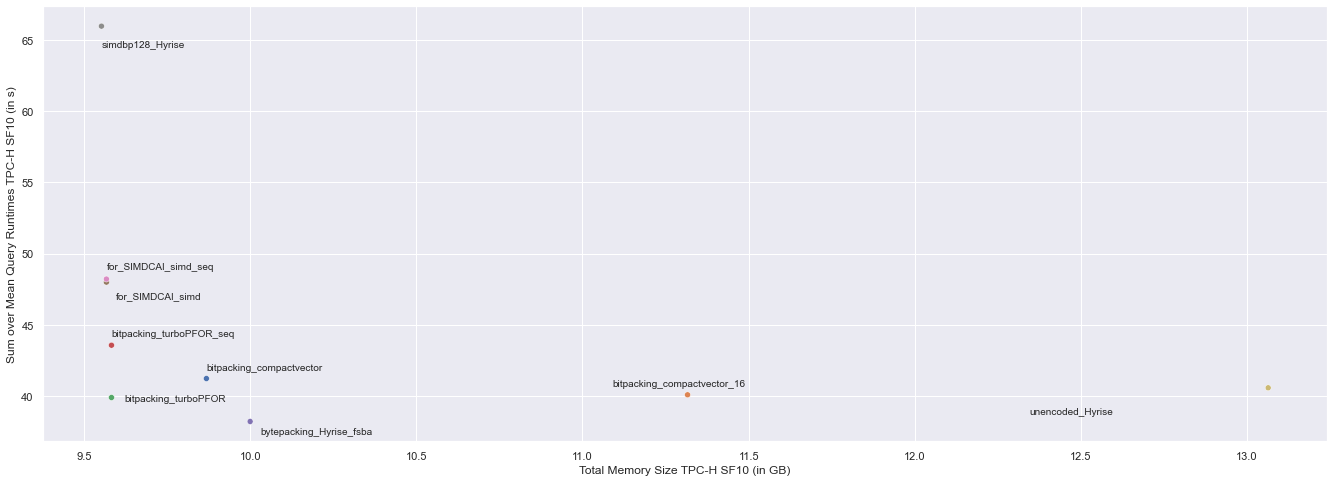

In [13]:
d = get_df(data_folder)
plot = sns.scatterplot(data=d, x="total_size", y="total_runtime", hue="codec")
plot.set_ylabel("Sum over Mean Query Runtimes TPC-H SF10 (in s)")
plot.set_xlabel("Total Memory Size TPC-H SF10 (in GB)")


offsets = {
    "bitpacking_compactvector" : (0,1),
    "bitpacking_compactvector_16" : (-2,1),
    "bitpacking_turboPFOR" : (0.4,-0.4),
    "bitpacking_turboPFOR_seq" : (0,1),
    "bytepacking_Hyrise_fsba" : (0.3,-1.5),
    "for_SIMDCAI_simd" : (0.3,-1.6),
    "for_SIMDCAI_simd_seq" : (0,1),
    "simdbp128_Hyrise" : (0,-1.5),
    "unencoded_Hyrise" : (-5.5,-3),
}

for i, (codec, size, runtime) in enumerate(zip(d["codec"], d["total_size"], d["total_runtime"])):
    plot.annotate(codec, (size + offsets[codec][0] * 0.01 * size, runtime + offsets[codec][1] * 0.015 * runtime), fontsize=10)

plot.legend_.remove()

plt.savefig(f"visualizations/pareto_1.svg", format="svg")

In [14]:
d

,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO
0,sizes_bitpacking_compactvector.txt,9.868210,1445245248,664533612,7758431223,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,41.215268,1.336982,bitpacking_compactvector,False
1,sizes_bitpacking_compactvector_f.txt,11.316270,1609638576,989767660,8716863591,bitpacking_compactvector_16,./tpch_bitpacking_compactvector_f_singlethread...,40.071431,1.420814,bitpacking_compactvector_16,False
2,sizes_bitpacking_turbopfor.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR,./tpch_bitpacking_turbopfor_singlethreaded.json,39.880828,1.452004,bitpacking_turboPFOR,False
3,sizes_bitpacking_turbopfor_seq.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR_seq,./tpch_bitpacking_turbopfor_seq_singlethreaded...,43.558703,1.215173,bitpacking_turboPFOR_seq,False
4,sizes_dictionary.txt,9.999840,1372782099,676386560,7950670887,bytepacking_Hyrise_fsba,./tpch_dictionary_singlethreaded.json,38.195395,1.573198,bytepacking_Hyrise_fsba,False
5,sizes_bitpacking_simdcai.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd,./tpch_bitpacking_simdcai_singlethreaded.json,47.996114,1.032475,for_SIMDCAI_simd,False
6,sizes_bitpacking_simdcai_seq.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd_seq,./tpch_bitpacking_simdcai_seq_singlethreaded.json,48.211274,1.074156,for_SIMDCAI_simd_seq,False
7,sizes_simdbp.txt,9.552397,1307080816,602595564,7642720727,simdbp128_Hyrise,./tpch_simdbp_singlethreaded.json,65.993290,0.858254,simdbp128_Hyrise,False
8,sizes_compressionUnencoded.txt,13.063740,2083656732,1389433132,9590650263,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,40.564471,1.482762,unencoded_Hyrise,False


In [15]:
low_level["fancy_name"].unique()

array(['for_SIMDCAI_simd', 'bitpacking_turboPFOR',
       'bitpacking_turboPFOR_seq', 'unencoded_Hyrise',
       'bitpacking_compactvector', 'for_SIMDCAI_simd_seq',
       'bitpacking_compactvector_16', 'bytepacking_Hyrise_fsba'],
      dtype=object)

In [16]:
base = d[d["codec"] == "unencoded_Hyrise"]["total_runtime"].values[0]
d["relative_runtime"] = d["total_runtime"] / base
d

,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO,relative_runtime
0,sizes_bitpacking_compactvector.txt,9.868210,1445245248,664533612,7758431223,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,41.215268,1.336982,bitpacking_compactvector,False,1.016044
1,sizes_bitpacking_compactvector_f.txt,11.316270,1609638576,989767660,8716863591,bitpacking_compactvector_16,./tpch_bitpacking_compactvector_f_singlethread...,40.071431,1.420814,bitpacking_compactvector_16,False,0.987846
2,sizes_bitpacking_turbopfor.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR,./tpch_bitpacking_turbopfor_singlethreaded.json,39.880828,1.452004,bitpacking_turboPFOR,False,0.983147
3,sizes_bitpacking_turbopfor_seq.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR_seq,./tpch_bitpacking_turbopfor_seq_singlethreaded...,43.558703,1.215173,bitpacking_turboPFOR_seq,False,1.073814
4,sizes_dictionary.txt,9.999840,1372782099,676386560,7950670887,bytepacking_Hyrise_fsba,./tpch_dictionary_singlethreaded.json,38.195395,1.573198,bytepacking_Hyrise_fsba,False,0.941597
5,sizes_bitpacking_simdcai.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd,./tpch_bitpacking_simdcai_singlethreaded.json,47.996114,1.032475,for_SIMDCAI_simd,False,1.183206
6,sizes_bitpacking_simdcai_seq.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd_seq,./tpch_bitpacking_simdcai_seq_singlethreaded.json,48.211274,1.074156,for_SIMDCAI_simd_seq,False,1.188510
7,sizes_simdbp.txt,9.552397,1307080816,602595564,7642720727,simdbp128_Hyrise,./tpch_simdbp_singlethreaded.json,65.993290,0.858254,simdbp128_Hyrise,False,1.626874
8,sizes_compressionUnencoded.txt,13.063740,2083656732,1389433132,9590650263,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,40.564471,1.482762,unencoded_Hyrise,False,1.000000
